# Continuous Control

---

In this notebook, you will learn how to exploit the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

Note that this notebook is designed for solving the second version of the project with 20 agents!

### 1. Start the Environment

We start from importing the necessary packages. If the code cell below causes an error, please revisit the project instructions to cross-check that you have successfully installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
# In case you use the Udacity work space.
!pip -q install ./python

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# if you use a Mac and Reacher in the same folder as the notebook
env = UnityEnvironment(file_name='Reacher.app', seed=14)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every component in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# Size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# Examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:\n', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.60454559e+00 -1.00000000e+00
  7.56414795e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.61742783e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to exploit the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# Default code. Go to section 4 for training the agent.
#
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# Load the packages
import matplotlib.pyplot as plt
%matplotlib inline
import random
import copy
import time
from collections import deque, namedtuple
import torch
from ddpg_agent import Agent

In [8]:
def ddpg(n_episodes=1000, threshold=30, print_every=10):
    """
    Create the DDPG agent, output the history of average scores per episode and cummulative rewards per recent 100 episodes.
    Params
    =====
        n_episodes (int): maximum number of training episodes
        threshold (int): score required to solve the environment
        print_every (int): frequency per which to print the performance
    """

    # DDPG agent
    agent = Agent(state_size, action_size, seed=1)

    scores_tot = [] # stores the average scores per episode
    scores_deque = deque(maxlen=100) # stores the recent 100 average scores
    avg_scores_deque = [] # stores cummulative average scores over the last 100 episodes

    # It's safe to keep track of elapsed times per print_every
    start_time = time.time()

    for i_episode in range(1, n_episodes+1):
        # see section 3
        env_info = env.reset(train_mode = True)[brain_name]    # reset the environment
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)

        # reset the noise and time_stamp
        agent.reset()

        while True:
            actions = agent.act(states)                        # select actions as per policy
            env_info = env.step(actions)[brain_name]           # send the actions to tne environment
            next_states = env_info.vector_observations         # get the next states
            rewards = env_info.rewards                         # get rewards
            dones = env_info.local_done                        # see if episode has ended
            scores += rewards                                  # update the score

            agent.step(states, actions, rewards, next_states, dones) # store a tuple of experiences
            states = next_states                               # proceed to the nex states

            if np.any(dones):                                  # exit loop if at least one of the agents is finished
                break

        # Compute the average score per episode
        score_ep = np.mean(scores)
        # Store into each bucket
        scores_tot.append(score_ep)
        scores_deque.append(score_ep)
        # Compute the average of the cummulative rewards in the recent 100 episodes and store into the bucket
        avg_score_deque = np.mean(scores_deque)
        avg_scores_deque.append(avg_score_deque)

        # display the performance
        if i_episode % print_every == 0:
            elapsed_time = time.time() - start_time # stop to calculate the elapsed time
            #print('{}'.format(scores_deque))
            print('\rEpisode {}: \tAvg score (over last 100 EPs): {:.3f}\tElapsed time: {:.2f}'.format(i_episode, avg_score_deque, elapsed_time))
            start_time = time.time() #  start to calculate the next elapsed time

        # see if the environment has been solved
        if avg_score_deque > 30.0:
            print('\nEnvironment solved in {:d} EPs!'.format(i_episode-100))
            print('Avg Score (over last 100 EPs): {:.2f}'.format(avg_score_deque))

            break

    torch.save(agent.actor_local.state_dict(), 'check_point_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'check_point_critic.pth')


    return scores_tot, avg_scores_deque

scores_tot, avg_scores_deque = ddpg(n_episodes=1000, print_every=10)

Device used:  cpu
Episode 10: 	Avg score (over last 100 EPs): 1.369	Elapsed time: 77.79
Episode 20: 	Avg score (over last 100 EPs): 2.157	Elapsed time: 90.84
Episode 30: 	Avg score (over last 100 EPs): 3.312	Elapsed time: 97.80
Episode 40: 	Avg score (over last 100 EPs): 4.671	Elapsed time: 96.66
Episode 50: 	Avg score (over last 100 EPs): 6.361	Elapsed time: 109.40
Episode 60: 	Avg score (over last 100 EPs): 8.455	Elapsed time: 107.93
Episode 70: 	Avg score (over last 100 EPs): 10.715	Elapsed time: 78.68
Episode 80: 	Avg score (over last 100 EPs): 13.444	Elapsed time: 79.37
Episode 90: 	Avg score (over last 100 EPs): 16.107	Elapsed time: 87.72
Episode 100: 	Avg score (over last 100 EPs): 18.209	Elapsed time: 86.13
Episode 110: 	Avg score (over last 100 EPs): 21.812	Elapsed time: 90.25
Episode 120: 	Avg score (over last 100 EPs): 25.205	Elapsed time: 91.70
Episode 130: 	Avg score (over last 100 EPs): 28.374	Elapsed time: 90.08

Environment solved in 36 EPs!
Avg Score (over last 100 EPs

In [ ]:
# Make sure that you close the environment!
env.close()

### 5. Results

Below we plot the results in the previous section. The first figure shows the history of average scores over all of 20 agents per episode. In the second figure, the cummulative average score per 100 episodes tends to increase. This behavior continued smoothly until the environment was solved and thus the training stopped. Therefore, the implementation of the algorithm including the choice of hyper parameters worked well.

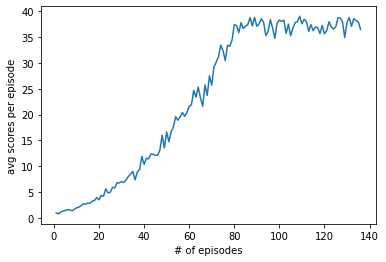

In [10]:
# Plot the trajectory of the average scores per episode
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_tot)+1), scores_tot)
plt.ylabel('avg scores per episode')
plt.xlabel('# of episodes')
plt.savefig('scores.eps')
plt.show()

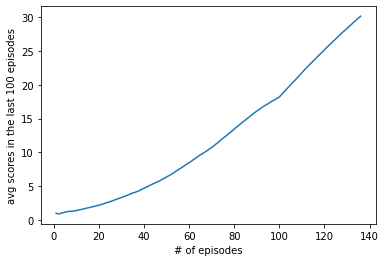

In [13]:
# Plot the trajectory of the average scores over last 100 episodes
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores_deque)+1), avg_scores_deque)
plt.ylabel('avg scores over the last 100 episodes')
plt.xlabel('# of episodes')
plt.savefig('scores.eps')
plt.show()